## Spatial aggregation. [4 Marks]


In [23]:
#question-1
Data=pd.read_csv("C:\\Users\\lenovo\\Downloads\\Data.csv")

State_data=pd.read_csv("C:\\Users\\lenovo\\Downloads\\State_Data.csv")

In [24]:
import pandas as pd

# Load the dataset
data = pd.read_csv("C:\\Users\\lenovo\\Downloads\\Data.csv")

# Group the data by state and calculate the average PM2.5 concentration
avg_pm25_state = data.groupby('state')['PM2.5'].mean()

# Find the state with the highest average PM2.5 concentration
highest_avg_pm25_state = avg_pm25_state.idxmax()
highest_avg_pm25_value = avg_pm25_state.max()

# Output the result
print("State with the highest average PM2.5 concentration:", highest_avg_pm25_state)
print("Highest average PM2.5 concentration:", highest_avg_pm25_value)



State with the highest average PM2.5 concentration: Delhi
Highest average PM2.5 concentration: 104.1009176780069


In [ ]:
#question-2
import pandas as pd
air_quality_df = pd.read_csv('/media/Data (4).csv')
ncap_funding_df = pd.read_csv('/media/NCAP_Funding.csv')
state_population_area_df = pd.read_csv('/media/State_data.csv')
air_quality_df['Timestamp'] = pd.to_datetime(air_quality_df['Timestamp'], errors='coerce')

# Extract year from 'Timestamp' column
air_quality_df['Year'] = air_quality_df['Timestamp'].dt.year
data_2023 = air_quality_df[air_quality_df['Year'] == 2023]

# column to identify hazardous PM2.5 days (>300 µg/m³)
data_2023['Hazardous'] = data_2023['PM2.5'].apply(lambda x: 1 if x > 300 else 0)

# Group by 'State' and 'Date' to count unique hazardous days per state
hazardous_days = data_2023[data_2023['Hazardous'] == 1].groupby('state')['Hazardous'].count()

# Find the state with the most hazardous days
most_hazardous_state = hazardous_days.idxmax()
most_hazardous_days = hazardous_days.max()

print(f"The state with the most days of hazardous PM2.5 levels in 2023 is {most_hazardous_state} with {most_hazardous_days} days.")



In [ ]:
#question-3
# To convert the Timestamp to datatime
Data['Timestamp']= pd.to_datetime(Data['Timestamp'])

# To filter out the data for 2023 with the non-null values
df_2023= Data[(Data['Timestamp'].dt.year== 2023) & (Data['PM2.5'].notna())]

state_variability= df_2023.groupby('state')['PM2.5'].std()

#To find the state with highest variability
high_var_state= state_variability.idxmax()
high_var_value= state_variability.max()

print(f"{high_var_state} is having highest variability of {high_var_value}")

In [ ]:
#question 4

import pandas as pd
air_quality_df = pd.read_csv('/media/Data (4).csv')
air_quality_df['Timestamp'] = pd.to_datetime(air_quality_df['Timestamp'], errors='coerce')
covid_period_data = air_quality_df[(air_quality_df['Timestamp'].dt.year == 2020) | (air_quality_df['Timestamp'].dt.year == 2021)]
state_pm25_covid = covid_period_data.groupby('state')['PM2.5'].mean()


state_with_lowest_pm25 = state_pm25_covid.idxmin()
lowest_pm25_value = state_pm25_covid.min()


print(f"The state with the lowest average PM2.5 levels during the COVID period (2020-2021) is {state_with_lowest_pm25} with an average PM2.5 level of {lowest_pm25_value:.2f} µg/m³.")



## temporal aggregation

In [ ]:
#question 1
import pandas as pd

# Convert 'Timestamp' column to datetime if it isn't already
air_quality_df['Timestamp'] = pd.to_datetime(air_quality_df['Timestamp'], errors='coerce')

# Extract Year, Month, and Day
air_quality_df['Year'] = air_quality_df['Timestamp'].dt.year
air_quality_df['Month'] = air_quality_df['Timestamp'].dt.month
air_quality_df['Day'] = air_quality_df['Timestamp'].dt.day

# Filter data for August 2020
aug_2020_data = air_quality_df[(air_quality_df['Year'] == 2020) & (air_quality_df['Month'] == 8)]

# Convert PM2.5 to numeric using .loc to avoid SettingWithCopyWarning
aug_2020_data.loc[:, 'PM2.5'] = pd.to_numeric(aug_2020_data['PM2.5'], errors='coerce')

# Drop rows with missing PM2.5 values
aug_2020_data = aug_2020_data.dropna(subset=['PM2.5'])

# Find the station with the highest PM2.5 recorded in August 2020
max_pm25_station = aug_2020_data.loc[aug_2020_data['PM2.5'].idxmax()]  # Find the row with the highest PM2.5
highest_pm25_station = max_pm25_station['station']  # Station name
highest_pm25_value = max_pm25_station['PM2.5']  # Highest PM2.5 value

# Print the result
print("Station with the highest PM2.5 recorded in August 2020:", highest_pm25_station)
print("Highest PM2.5 value recorded at this station:", highest_pm25_value)





In [33]:
#question-2
import pandas as pd

# File path for the CSV files
data_file_path = r'C:\\Users\\lenovo\\Downloads\\Data.csv'  # Change this to the path of your data file
state_data_file_path = r'C:\\Users\\lenovo\\Downloads\\State_data.csv'  # Path to the state data file

# Load the datasets
data = pd.read_csv(data_file_path)
state_data = pd.read_csv(state_data_file_path)

# Preview the first few rows of both datasets (for understanding the structure)
print("Data File:")
print(data.head())

print("\nState Data File:")
print(state_data.head())

# Filter the data for the year 2018 and the specific station 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB'
data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')
data_2018_station = data[(data['Timestamp'].dt.year == 2018) & 
                          (data['station'] == 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB')]

# Define a function to categorize the month into seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    elif month in [6, 7, 8, 9]:
        return 'Monsoon'
    else:
        return 'Post-Monsoon'

# Apply the function to create a 'Season' column based on the month of the Date column
data_2018_station['Season'] = pd.to_datetime(data_2018_station['Timestamp']).dt.month.apply(get_season)

# Calculate the average PM2.5 concentration for each season
avg_pm25_season_2018 = data_2018_station.groupby('Season')['PM2.5'].mean()

# Identify the season with the highest average PM2.5 concentration
max_season_pm25 = avg_pm25_season_2018.idxmax()
max_season_pm25_value = avg_pm25_season_2018.max()

# Print the average PM2.5 for each season and the season with the highest pollution


Data File:
    Timestamp                       station  PM2.5       PM10  \
0  2017-01-01    32Bungalows, Bhilai - CECB    NaN        NaN   
1  2017-01-01          AIIMS, Raipur - CECB    NaN        NaN   
2  2017-01-01  Adarsh Nagar, Jaipur - RSPCB    NaN        NaN   
3  2017-01-01    Airoli, Navi Mumbai - MPCB    NaN  54.743723   
4  2017-01-01    Airport Area, Indore - IMC    NaN        NaN   

                                             address         city   latitude  \
0  Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...       Bhilai  21.194815   
1  All India Institute Of Medical Science, Gate N...       Raipur  21.258815   
2  Psychiatric Centre, Janta Colony, Govind Marg,...       Jaipur  26.902909   
3                                                NaN  Navi Mumbai  19.149400   
4                                                NaN          NaN        NaN   

   longitude         state  
0  81.314770  Chhattisgarh  
1  81.578979  Chhattisgarh  
2  75.836858     Rajasthan  
3

C:\Users\lenovo\AppData\Local\Temp\ipykernel_23000\2329003738.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2018_station['Season'] = pd.to_datetime(data_2018_station['Timestamp']).dt.month.apply(get_season)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_23000\1021889458.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['DayOfWeek']= df_2021['Timestamp'].dt.dayofweek
C:\Users\lenovo\AppData\Local\Temp\ipykernel_23000\1021889458.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['Weekend']= df_2021['DayOfWeek'].isin([5,6])
C:\Users\lenovo\AppData\Local\Temp\ipykernel_23000\1021889458.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

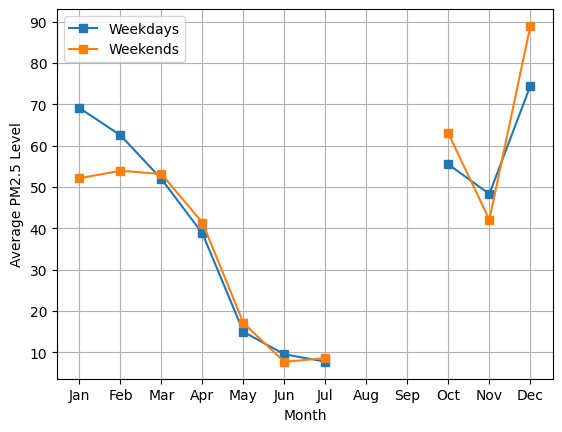

In [88]:
#question -3
# To convert the Timestamp to datatime
Data['Timestamp']= pd.to_datetime(Data['Timestamp'])

# To filter out the data for 2023 with the non-null values
df_2021= Data[(Data['Timestamp'].dt.year== 2021) & (Data['station']== "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB")]

df_2021['DayOfWeek']= df_2021['Timestamp'].dt.dayofweek
df_2021['Weekend']= df_2021['DayOfWeek'].isin([5,6])

df_2021['Month']= df_2021['Timestamp'].dt.month

weekday_avg= df_2021[~df_2021['Weekend']].groupby('Month')['PM2.5'].mean()
weekend_avg= df_2021[df_2021['Weekend']].groupby('Month')['PM2.5'].mean()

plt.figure()

plt.plot(weekday_avg.index, weekday_avg.values, label= 'Weekdays', marker='s')
plt.plot(weekend_avg.index, weekend_avg.values, label= 'Weekends', marker='s')

plt.xlabel('Month')
plt.ylabel('Average PM2.5 Level')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()

plt.grid(True)
plt.show()

Spatio-temporal aggregation

In [ ]:
# To convert the Timestamp to datatime
#question-1
Data['Timestamp']= pd.to_datetime(Data['Timestamp'])

# To filter out the data for 2023 with the non-null values
df_2022= Data[Data['Timestamp'].dt.year== 2022]

df_2022['Month']= df_2022['Timestamp'].dt.month

summer_month= [3,4,5]
monsoon_month= [6,7,8,9]

df_summer= df_2022[df_2022['Month'].isin(summer_month)]
df_monsoon= df_2022[df_2022['Month'].isin(monsoon_month)]

summer_avg= df_summer.groupby('state')['PM2.5'].mean()
monsoon_avg= df_monsoon.groupby('state')['PM2.5'].mean()

percentage_change= ((monsoon_avg - summer_avg)/ summer_avg)*100

max_change_state= percentage_change.abs().idxmax()
max_change_value= percentage_change[max_change_state]

print(f"{max_change_state} is having the highest difference of PM2.5 levels between summer and monsoon months with the value of {max_change_value:.2f}%")

    Timestamp                       station  PM2.5       PM10  \
0  2017-01-01    32Bungalows, Bhilai - CECB    NaN        NaN   
1  2017-01-01          AIIMS, Raipur - CECB    NaN        NaN   
2  2017-01-01  Adarsh Nagar, Jaipur - RSPCB    NaN        NaN   
3  2017-01-01    Airoli, Navi Mumbai - MPCB    NaN  54.743723   
4  2017-01-01    Airport Area, Indore - IMC    NaN        NaN   

                                             address         city   latitude  \
0  Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...       Bhilai  21.194815   
1  All India Institute Of Medical Science, Gate N...       Raipur  21.258815   
2  Psychiatric Centre, Janta Colony, Govind Marg,...       Jaipur  26.902909   
3                                                NaN  Navi Mumbai  19.149400   
4                                                NaN          NaN        NaN   

   longitude         state  
0  81.314770  Chhattisgarh  
1  81.578979  Chhattisgarh  
2  75.836858     Rajasthan  
3  72.998600

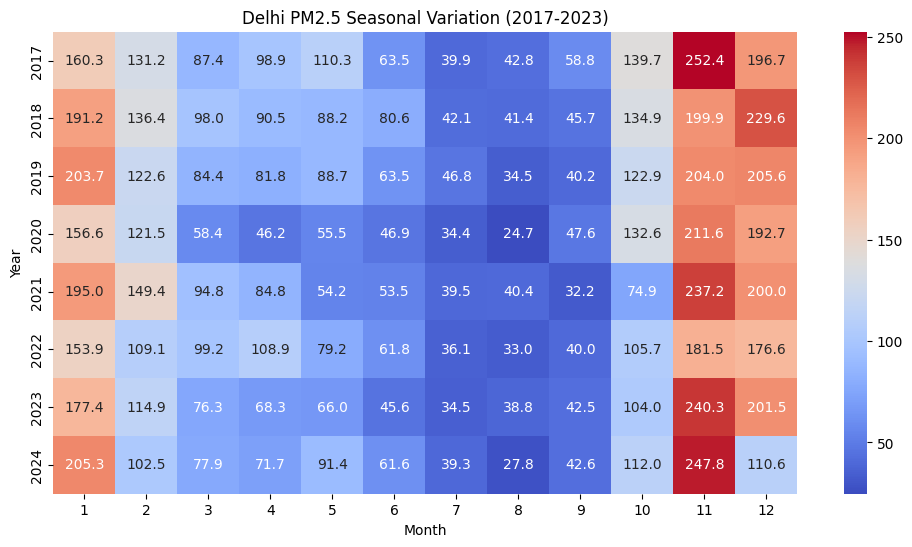

In [66]:
#question-2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("C:\\Users\\lenovo\\Downloads\\Data.csv")
State_data = pd.read_csv("C:\\Users\\lenovo\\Downloads\\State_Data.csv")

# Print the first few rows of the datasets
print(data.head())
print(State_data.head())

# Convert 'Timestamp' column to datetime
data["Timestamp"] = pd.to_datetime(data["Timestamp"])

# Filter data for Delhi from 2017 onward
delhi_data = data[(data["state"] == "Delhi") & (data["Timestamp"].dt.year >= 2017)]

# Calculate the seasonal average of PM2.5 for each year and month
seasonal_avg = delhi_data.groupby([delhi_data["Timestamp"].dt.year, delhi_data["Timestamp"].dt.month])["PM2.5"].mean().unstack()

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(seasonal_avg, cmap="coolwarm", annot=True, fmt=".1f")
plt.xlabel("Month")
plt.ylabel("Year")
plt.title("Delhi PM2.5 Seasonal Variation (2017-2023)")
plt.show()


In [ ]:
#question 3
#sec--3
#spatio
import pandas as pd
import matplotlib.pyplot as plt

air_quality_df = pd.read_csv('/media/Data (4).csv')
air_quality_df['Timestamp'] = pd.to_datetime(air_quality_df['Timestamp'], errors='coerce')

delhi_data = air_quality_df[(air_quality_df['city'] == 'Delhi') &
                            (air_quality_df['Timestamp'].dt.year >= 2017) & (air_quality_df['Timestamp'].dt.year <= 2023)]

mumbai_data = air_quality_df[(air_quality_df['city'] == 'Mumbai') &
                             (air_quality_df['Timestamp'].dt.year >= 2017) & (air_quality_df['Timestamp'].dt.year <= 2023)]

delhi_data['PM2.5'] = pd.to_numeric(delhi_data['PM2.5'], errors='coerce')
mumbai_data['PM2.5'] = pd.to_numeric(mumbai_data['PM2.5'], errors='coerce')

# Drop rows with missing PM2.5 values
delhi_data = delhi_data.dropna(subset=['PM2.5'])
mumbai_data = mumbai_data.dropna(subset=['PM2.5'])

# Filter data to ensure no future years (after 2023) are included
delhi_data = delhi_data[delhi_data['Timestamp'].dt.year <= 2023]
mumbai_data = mumbai_data[mumbai_data['Timestamp'].dt.year <= 2023]

# Plot time-series for PM2.5 levels for both cities
plt.figure(figsize=(14, 7))
plt.plot(delhi_data['Timestamp'], delhi_data['PM2.5'], label='Delhi', color='blue')
plt.plot(mumbai_data['Timestamp'], mumbai_data['PM2.5'], label='Mumbai', color='red')

# Adding titles and labels
plt.title('Time-Series Comparison of PM2.5 Levels: Delhi vs Mumbai (2017-2023)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('PM2.5 (µg/m³)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate fluctuations (Standard Deviation) for both cities
delhi_fluctuation = delhi_data['PM2.5'].std()
mumbai_fluctuation = mumbai_data['PM2.5'].std()

print("Fluctuation in PM2.5 levels (Standard Deviation):")
print(f"Delhi: {delhi_fluctuation}")
print(f"Mumbai: {mumbai_fluctuation}")







## population based

In [ ]:
#q1
stations_per_state = Data.groupby("state")["station"].nunique()
stations_per_state = stations_per_state.reset_index()
stations_per_state.rename(columns={"state": "State"}, inplace=True)
merged_df = pd.merge(stations_per_state, State_data, on="State")
merged_df["Pop_per_Station"] = merged_df["Population"] / merged_df["station"]
min_state = merged_df.loc[merged_df["Pop_per_Station"].idxmin()]
print(min_state["State"])


In [ ]:
#q2
import pandas as pd
import matplotlib.pyplot as plt


air_quality_df = pd.read_csv('/media/Data (4).csv')


air_quality_df['Timestamp'] = pd.to_datetime(air_quality_df['Timestamp'], errors='coerce')
air_quality_2023 = air_quality_df[air_quality_df['Timestamp'].dt.year == 2023]
state_pm25_2023 = air_quality_2023.groupby('state')['PM2.5'].sum()


state_population_area_df = pd.read_csv('/media/State_data.csv')
state_pm25_2023 = state_pm25_2023.reset_index()  # Reset index to turn Series into DataFrame

# Rename 'State' to 'state' in population data for consistency
state_population_area_df.rename(columns={'State': 'state'}, inplace=True)

#  Merge the PM2.5 data with population data based on the 'state' column
state_pm25_data = state_pm25_2023.merge(state_population_area_df[['state', 'Population']], on='state')

# Calculate Per Capita PM2.5 Exposure
state_pm25_data['Per Capita PM2.5'] = state_pm25_data['PM2.5'] / state_pm25_data['Population']

# Sort the data to get the top 5 most polluted states based on per capita exposure
top_states = state_pm25_data.sort_values(by='Per Capita PM2.5', ascending=False).head(5)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_states['state'], top_states['Per Capita PM2.5'], color='skyblue')
plt.title('Top 5 Most Polluted States in 2023 (Per Capita PM2.5 Exposure)', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Per Capita PM2.5 Exposure (µg/m³)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the top 5 states data
print(top_states[['state', 'Per Capita PM2.5']])






In [77]:
#q3
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("C:\\Users\\lenovo\\Downloads\\data.csv")

# Strip any leading or trailing spaces in column names
data.columns = data.columns.str.strip()

# Print the column names to check for any issues
print(data.columns)

# Check the first few rows of the data to verify if the 'Timestamp' or similar column exists
print(data.head())

# If the 'Timestamp' column exists, convert it to datetime
if 'Timestamp' in data.columns:
    data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')
else:
    print("The 'Timestamp' column is not found. Check the column names and use the correct one.")

# Ensure 'PM2.5' is numeric and coerce errors to NaN if not numeric
data['PM2.5'] = pd.to_numeric(data['PM2.5'], errors='coerce')

# Filter the data for the years 2017 to 2023 and Delhi only
data_delhi = data[(data['station'] == 'Delhi') & (data['Timestamp'].dt.year >= 2017) & (data['Timestamp'].dt.year <= 2023)]

# Add a 'Season' column based on the month of the 'Timestamp'
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    else:
        return 'Monsoon'

data_delhi['Season'] = data_delhi['Timestamp'].dt.month.apply(get_season)

# Calculate the average PM2.5 levels for each season and year
seasonal_pm25 = data_delhi.groupby([data_delhi['Season'], data_delhi['Timestamp'].dt.year])['PM2.5'].mean().unstack()

# Print the resulting seasonal_pm25 DataFrame to check for any issues
print(seasonal_pm25)

# Check if seasonal_pm25 contains numeric data
if seasonal_pm25.isnull().values.any():
    print("Warning: There are missing values in the seasonal data.")
    # You could drop missing values or fill them with a suitable value
    seasonal_pm25 = seasonal_pm25.fillna(0)

# Ensure the data contains numeric values before plotting
if seasonal_pm25.select_dtypes(include='number').empty:
    print("Error: The seasonal_pm25 DataFrame does not contain any numeric data.")
else:
    # Plot the data
    plt.figure(figsize=(12, 6))
    seasonal_pm25.plot(kind='bar', width=0.8)

    # Customize the plot
    plt.title('Average PM2.5 Levels in Delhi (2017-2023) by Season', fontsize=16)
    plt.xlabel('Season', fontsize=12)
    plt.ylabel('Average PM2.5 (µg/m³)', fontsize=12)
    plt.xticks(rotation=0)
    plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Show the plot
    plt.tight_layout()
    plt.show()


Index(['Timestamp', 'station', 'PM2.5', 'PM10', 'address', 'city', 'latitude',
       'longitude', 'state'],
      dtype='object')
    Timestamp                       station  PM2.5       PM10  \
0  2017-01-01    32Bungalows, Bhilai - CECB    NaN        NaN   
1  2017-01-01          AIIMS, Raipur - CECB    NaN        NaN   
2  2017-01-01  Adarsh Nagar, Jaipur - RSPCB    NaN        NaN   
3  2017-01-01    Airoli, Navi Mumbai - MPCB    NaN  54.743723   
4  2017-01-01    Airport Area, Indore - IMC    NaN        NaN   

                                             address         city   latitude  \
0  Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...       Bhilai  21.194815   
1  All India Institute Of Medical Science, Gate N...       Raipur  21.258815   
2  Psychiatric Centre, Janta Colony, Govind Marg,...       Jaipur  26.902909   
3                                                NaN  Navi Mumbai  19.149400   
4                                                NaN          NaN        NaN  

In [ ]:
#area based

In [ ]:
#q1
import pandas as pd
import matplotlib.pyplot as plt
air_quality_df = pd.read_csv('/media/Data (4).csv')
print(air_quality_df.head())

#State Data with Population and Area
state_data = {
    'State': ['Uttar Pradesh', 'Maharashtra', 'Bihar', 'West Bengal', 'Madhya Pradesh', 'Tamil Nadu'],
    'Population': [199812341, 112374333, 104099452, 91276115, 72626809, 72147030],
    'Area (km2)': [240928, 307713, 94163, 88752, 308252, 130058]
}

state_data_df = pd.DataFrame(state_data)
print(state_data_df.head())
air_quality_df['Timestamp'] = pd.to_datetime(air_quality_df['Timestamp'], errors='coerce')

# Filter the data to include only 2020-2021
air_quality_df = air_quality_df[air_quality_df['Timestamp'].dt.year.isin([2020, 2021])]
state_pm25 = air_quality_df.groupby('state')['PM2.5'].mean()
print(state_pm25)

# Merge the PM2.5 data with State Population and Area data
# Merge the average PM2.5 with the state data (Population and Area)
state_pm25_area = state_pm25.to_frame().merge(state_data_df[['State', 'Area (km2)']], left_index=True, right_on='State', how='left')
print(state_pm25_area)

# Step 5: Calculate PM2.5 concentration per square kilometer
# Calculate PM2.5 per square kilometer for each state
state_pm25_area['PM2.5 per sq km'] = state_pm25_area['PM2.5'] / state_pm25_area['Area (km2)']

# Check the PM2.5 per square kilometer for each state
print(state_pm25_area[['State', 'PM2.5 per sq km']])
plt.figure(figsize=(10, 6))
plt.bar(state_pm25_area['State'], state_pm25_area['PM2.5 per sq km'], color='blue')
plt.xlabel('States')
plt.ylabel('PM2.5 per sq km')
plt.title('PM2.5 Concentration per Square Kilometer by State')
plt.xticks(rotation=90)
# prevent label clipping
plt.tight_layout()
plt.show()


In [ ]:
#q2
# Merging Data (stations data) with State_data (state data: Population & Area)
# We will first count the number of stations per state from Data
stations_per_state = Data['state'].value_counts().reset_index()
stations_per_state.columns = ['state', 'stations']

# Merging with State_data to get the area
df_area = State_data[['State', 'Area (km2)']].rename(columns={'State': 'state', 'Area (km2)': 'area'})
df_merged = pd.merge(stations_per_state, df_area, on='state', how='left')

# Calculating the number of monitoring stations per square kilometer
df_merged['stations_per_km2'] = df_merged['stations'] / df_merged['area']

# Plotting the bar plot for station density
plt.figure(figsize=(10, 6))
plt.bar(df_merged['state'], df_merged['stations_per_km2'], color='blue')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Monitoring Stations per Square Kilometer')
plt.title('Monitoring Stations Density per Square Kilometer by State')
plt.tight_layout()
plt.show()

# To find the state with the highest monitoring station density
max_density_state = df_merged.loc[df_merged['stations_per_km2'].idxmax()]
print(f"{max_density_state['state']} is the state having highest density of monitoring stations per square kilometer with a density of {max_density_state['stations_per_km2']:.2f} stations/km²")


In [89]:
#q3
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a dataset df with the sensor locations
# For this example, let's assume you have columns 'latitude' and 'longitude' in your dataframe

# Sample data for illustration (latitude, longitude, and station name)
sensor_data = pd.DataFrame({
    'station': ['Station A', 'Station B', 'Station C', 'Station D'],
    'latitude': [28.7041, 19.0760, 22.5726, 13.0827],  # Example latitudes (Delhi, Mumbai, Kolkata, Chennai)
    'longitude': [77.1025, 72.8777, 88.3639, 80.2707]  # Example longitudes
})

# Load the map of India using Geopandas (you need to have a shapefile of India, can use a built-in one)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter out India data
india_map = world[world.name == 'India']

# Create a GeoDataFrame from the sensor data
gdf_sensors = gpd.GeoDataFrame(sensor_data, 
                                geometry=gpd.points_from_xy(sensor_data.longitude, sensor_data.latitude))

# Plot the map of India
fig, ax = plt.subplots(figsize=(10, 10))
india_map.plot(ax=ax, color='lightblue', edgecolor='black')

# Plot the sensors on the map
gdf_sensors.plot(ax=ax, color='red', markersize=50, label='Sensors')

# Add labels for each sensor
for idx, row in gdf_sensors.iterrows():
    ax.text(row['longitude'] + 0.1, row['latitude'], row['station'], fontsize=12, color='black')

# Customize the plot
plt.title("Sensor Locations on the Map of India", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()

# Show the plot
plt.show()

AttributeError: The geopandas.dataset has been deprecated and was removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

In [ ]:
#Funding Based 

In [ ]:
#funding
#q1
import pandas as pd

# Load the datasets
air_quality_df = pd.read_csv('/media/Data (4).csv')  # Path to air quality data
ncap_funding_df = pd.read_csv('/media/NCAP_Funding.csv')  # Path to NCAP funding data

# Step 1: Convert the "Amount released during FY 2021-22" column to numeric
ncap_funding_df['Amount released during FY 2021-22'] = pd.to_numeric(
    ncap_funding_df['Amount released during FY 2021-22'], errors='coerce')

# Step 2: Filter the NCAP funding data for 2021
# We will use the "Amount released during FY 2021-22" to filter for 2021 funding
ncap_funding_2021 = ncap_funding_df[ncap_funding_df['Amount released during FY 2021-22'] > 0]

# Step 3: Get the list of states that received funding in 2021
states_with_ncap = ncap_funding_2021['State'].unique()

# Step 4: Preprocess the Air Quality Data for 2021
# Convert 'Timestamp' to datetime and filter for 2021
air_quality_df['Timestamp'] = pd.to_datetime(air_quality_df['Timestamp'], errors='coerce')
air_quality_2021 = air_quality_df[air_quality_df['Timestamp'].dt.year == 2021]

# Step 5: Calculate the average PM2.5 for each state
state_pm25_2021 = air_quality_2021.groupby('state')['PM2.5'].mean()

# Step 6: Classify states into those that received NCAP funding and those that did not
states_with_ncap_data = state_pm25_2021[state_pm25_2021.index.isin(states_with_ncap)]
states_without_ncap_data = state_pm25_2021[~state_pm25_2021.index.isin(states_with_ncap)]

# Step 7: Compare the average PM2.5 levels
avg_pm25_ncap = states_with_ncap_data.mean()
avg_pm25_no_ncap = states_without_ncap_data.mean()

# Print results
print(f"Average PM2.5 levels in states with NCAP funding in 2021: {avg_pm25_ncap}")
print(f"Average PM2.5 levels in states without NCAP funding in 2021: {avg_pm25_no_ncap}")

# Optional: Plot the comparison
import matplotlib.pyplot as plt

# Create a bar plot to compare the average PM2.5 levels
plt.figure(figsize=(8, 6))
pm25_comparison = [avg_pm25_ncap, avg_pm25_no_ncap]
labels = ['States with NCAP Funding', 'States without NCAP Funding']
plt.bar(labels, pm25_comparison, color=['green', 'red'])

# Adding title and labels
plt.title('Average PM2.5 Levels in 2021: NCAP Funding vs No Funding')
plt.ylabel('Average PM2.5 Level')
plt.show()











In [76]:
#q2
import pandas as pd

# Load the dataset
data = pd.read_csv("C:\\Users\\lenovo\\Downloads\\data.csv")

# Convert 'Timestamp' to datetime (assuming 'Timestamp' is the correct column name)
data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')

# Filter the data for the year 2021
data_2021 = data[data['Timestamp'].dt.year == 2021]

# Filter data for Maharashtra and Madhya Pradesh
data_maharashtra = data_2021[data_2021['state'] == 'Maharashtra']
data_madhya_pradesh = data_2021[data_2021['state'] == 'Madhya Pradesh']

# Ensure that PM2.5 is numeric and coerce errors to NaN if not numeric
data_maharashtra['PM2.5'] = pd.to_numeric(data_maharashtra['PM2.5'], errors='coerce')
data_madhya_pradesh['PM2.5'] = pd.to_numeric(data_madhya_pradesh['PM2.5'], errors='coerce')

# Calculate the average PM2.5 for both states
avg_pm25_maharashtra = data_maharashtra['PM2.5'].mean()
avg_pm25_madhya_pradesh = data_madhya_pradesh['PM2.5'].mean()

# Display the average PM2.5 levels
print(f"Average PM2.5 in Maharashtra (2021): {avg_pm25_maharashtra}")
print(f"Average PM2.5 in Madhya Pradesh (2021): {avg_pm25_madhya_pradesh}")

# Population density data (you can either use static values or load them from an external source)
# Population density (persons per km^2) for each state in 2021
population_density_maharashtra = 365  # example value (replace with actual value)
population_density_madhya_pradesh = 236  # example value (replace with actual value)

# Analysis
print(f"\nPopulation Density of Maharashtra in 2021: {population_density_maharashtra} persons/km²")
print(f"Population Density of Madhya Pradesh in 2021: {population_density_madhya_pradesh} persons/km²")

# Analyze the impact of population density on pollution levels
if population_density_maharashtra > population_density_madhya_pradesh:
    print("\nMaharashtra has a higher population density. If we observe higher PM2.5 levels, this could be indicative of greater pollution due to higher population density.")
else:
    print("\nMadhya Pradesh has a higher population density. If we observe higher PM2.5 levels, this could be indicative of greater pollution due to higher population density.")


Average PM2.5 in Maharashtra (2021): 46.44004417107665
Average PM2.5 in Madhya Pradesh (2021): 47.095951831498965

Population Density of Maharashtra in 2021: 365 persons/km²
Population Density of Madhya Pradesh in 2021: 236 persons/km²

Maharashtra has a higher population density. If we observe higher PM2.5 levels, this could be indicative of greater pollution due to higher population density.


C:\Users\lenovo\AppData\Local\Temp\ipykernel_23000\1317794154.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_maharashtra['PM2.5'] = pd.to_numeric(data_maharashtra['PM2.5'], errors='coerce')
C:\Users\lenovo\AppData\Local\Temp\ipykernel_23000\1317794154.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_madhya_pradesh['PM2.5'] = pd.to_numeric(data_madhya_pradesh['PM2.5'], errors='coerce')


In [ ]:
#q3
# Aggregating the total funds released by each state (since NCAP_Funding contains multiple cities)
funding_per_state = NCAP_Funding.groupby('State')['Total fund released'].sum().reset_index()

# Merging with State_data (which contains the area data) on 'State'
df_area_funding = pd.merge(State_data[['State', 'Area (km2)']], funding_per_state, on='State', how='left')

# Creating the scatter plot with area vs. funding
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_area_funding, x='Area (km2)', y='Total fund released', hue='State', palette='tab20', s=100)

plt.title('Area vs. Total Funding Released by State')
plt.xlabel('Area (km²)')
plt.ylabel('Total Funding Released (in crores)')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Miscellaneous

In [87]:
#q1
import geopandas as gpd
import matplotlib.pyplot as plt  # Importing for plotting

# Path to the shapefile
shapefile_path = "/Users/lenovo/Downloads/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp"

# Load the shapefile using GeoPandas
world = gpd.read_file(shapefile_path)

# Filter the data for India
india_map = world[world['ADMIN'] == "India"]

# Plot India map
fig, ax = plt.subplots(figsize=(10, 10))  # Optional: Set the figure size
india_map.plot(ax=ax, color='lightgrey', edgecolor='black')

# Assuming you have the sensor location data in a DataFrame 'df' with 'latitude' and 'longitude' columns
# Example: df = pd.DataFrame({'latitude': [20.5937, 28.7041], 'longitude': [78.9629, 77.1025]})

sensor_locations = df[['latitude', 'longitude']].dropna()

# Plot sensor locations on the map
sensor_locations.plot(kind='scatter', x='longitude', y='latitude', ax=ax, color='red', label='Sensor Location')

# Add legend
plt.legend()

# Add title (optional)
plt.title("Map of India with Sensor Locations")

# Show the plot
plt.show()


DataSourceError: '/Users/lenovo/Downloads/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp' does not exist in the file system, and is not recognized as a supported dataset name.

In [ ]:
#q2
# Converting the 'Timestamp' column to datetime format
Data['Timestamp'] = pd.to_datetime(Data['Timestamp'])

# Filtering out the data for Delhi from 2018 to 2020
df_delhi = Data[(Data['state'] == 'Delhi') & (Data['Timestamp'].dt.year >= 2018) & (Data['Timestamp'].dt.year <= 2020)]

# Defining Diwali and New Year periods (approximate dates for simplicity)
diwali_dates = ['2018-11-06', '2019-10-27', '2020-11-14']
new_year_dates = ['2018-12-31', '2019-12-31', '2020-12-31']

# Converting dates to datetime format
diwali_dates = pd.to_datetime(diwali_dates)
new_year_dates = pd.to_datetime(new_year_dates)

# Plotting PM2.5 levels
plt.figure(figsize=(12, 8))
plt.plot(df_delhi['Timestamp'], df_delhi['PM2.5'], label='PM2.5 Levels', color='blue')

# Marking Diwali and New Year spikes with vertical lines
for date in diwali_dates:
    plt.axvline(x=date, color='red', linestyle='--', label=f'Diwali {date.year}')

for date in new_year_dates:
    plt.axvline(x=date, color='green', linestyle='--', label=f'New Year {date.year}')

plt.title('PM2.5 Levels in Delhi (2018-2020) with Diwali and New Year Periods')
plt.xlabel('Date')
plt.ylabel('PM2.5 Levels (µg/m³)')

plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
#q3
#last
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the datasets
air_quality_df = pd.read_csv('/media/Data (4).csv')  # Path to air quality data
ncap_funding_df = pd.read_csv('/media/NCAP_Funding.csv')  # Path to NCAP funding data

# Step 2: Convert funding data to numeric for proper analysis
ncap_funding_df['Amount released during FY 2020-21'] = pd.to_numeric(
    ncap_funding_df['Amount released during FY 2020-21'], errors='coerce'
)

# Step 3: Filter the NCAP funding data for 2020 and sum up total funding per state
ncap_funding_2020 = ncap_funding_df[['State', 'Amount released during FY 2020-21']]

# Find the state with the highest total NCAP funding in 2020
highest_funding_state = ncap_funding_2020.groupby('State')['Amount released during FY 2020-21'].sum().idxmax()
print(f"State with highest NCAP funding in 2020: {highest_funding_state}")

# Step 4: Filter the air quality data for the identified state
air_quality_df['Timestamp'] = pd.to_datetime(air_quality_df['Timestamp'], errors='coerce')
state_air_quality = air_quality_df[air_quality_df['state'] == highest_funding_state]

# Step 5: Filter for the years 2017 to 2023 and calculate average PM2.5 levels per year
state_air_quality['Year'] = state_air_quality['Timestamp'].dt.year
state_pm25_yearly = state_air_quality.groupby('Year')['PM2.5'].mean()

# Step 6: Plot the PM2.5 trend for the state over the years
plt.figure(figsize=(10, 6))
state_pm25_yearly.plot(kind='line', marker='o', color='b')
plt.title(f'Yearly Average PM2.5 Levels in {highest_funding_state} (2017-2023)')
plt.xlabel('Year')
plt.ylabel('Average PM2.5 (µg/m³)')
plt.grid(True)
plt.show()





